## SYDE 750 Assignment 1: Representation in Populations of Neurons

### By Tushar Chopra

* Due Date: January 28th at midnight
* Total marks: 20 (20% of final grade)
* Late penalty: 1 mark per day
* It is recommended that you use Python.
* Do not use or refer to any code from Nengo

## 1) Representation of Scalars

### 1.1) Basic encoding and decoding
Write a program that implements a neural representation of a scalar value  𝑥 . For the neuron model, use a rectified linear neuron model ( 𝑎=𝑚𝑎𝑥(𝐽,0) ). Choose the maximum firing rates randomly (uniformly distributed between 100Hz and 200Hz at x=1), and choose the x-intercepts randomly (uniformly distributed between -0.95 and 0.95). Use those values to compute the corresponding  𝛼  and  𝐽𝑏𝑖𝑎𝑠  parameters for each neuron. The encoders  𝑒  are randomly chosen and are either +1 or -1 for each neuron. Go through the following steps:

a). [1 mark] Plot the neuron responses  𝑎𝑖  for 16 randomly generated neurons. (See Figure 2.4 in the book for an example, but with a different neuron model and a different range of maximum firing rates).
Since you can't compute this for every possible  𝑥  value between -1 and 1, sample the x-axis with  𝑑𝑥=0.05 . Use this sampling throughout this question)

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


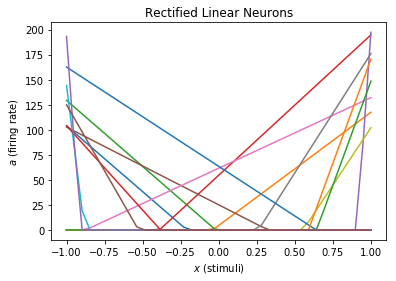

In [1]:
%pylab inline
import numpy as np

class RLNeuron:
    
    def __init__(self):
        
        self.max_firing_rate = np.random.uniform(low = 100, high = 200)
        self.x_intercept = np.random.uniform(low = -0.95,high = 0.95)
        self.encoder = np.random.choice([1,-1])
        
        self.alpha = self.max_firing_rate/(1-self.x_intercept)
        self.j_bias = -self.alpha * self.x_intercept
        
        
def computeNeurons(n,X):
    neuron_values_array = np.zeros([n,len(X)])
    for i in range(0,n):
        neu = RLNeuron()
        for j,x in enumerate(X): 
            a = neu.encoder * neu.alpha * x + neu.j_bias
            neuron_values_array[i][j] = max(a, 0)
    return neuron_values_array


number_of_samples = (1-(-1))/0.05
number_of_neurons = 16
X = np.linspace(-1,1,number_of_samples)
A = computeNeurons(number_of_neurons, X)

for i in range(0,number_of_neurons):
    plot(X, A[i])
xlabel('$x$ (stimuli)')
ylabel('$a$ (firing rate)')
title('Rectified Linear Neurons');

b). [1 mark] Compute the optimal decoders  𝑑𝑖  for those 16 neurons (as shown in class). Report their values.
The easiest way to compute  𝑑  is to use the matrix notation mentioned in the course notes.  𝐴  is the matrix of neuron activities (the same thing used to generate the plot in 1.1a).

In [2]:
upsilon = np.matmul(A,X) / number_of_samples
gamma = np.matmul(A, np.transpose(A))/ number_of_samples
gamma_inv = np.linalg.inv(gamma)
d = np.dot(gamma_inv, upsilon)
print(d)


[ 1.35491015e-05  5.75831122e-05 -5.14362435e-05  8.11779726e-04
 -2.63585835e-06 -1.52279328e-05  4.85354396e-03  5.81567935e-06
 -5.57635879e-07 -3.86537066e-04 -5.40821788e-03  5.02478789e-05
  1.24518466e-03 -6.58126690e-04  6.75664279e-05 -2.08455473e-05]


c). [1 mark] Compute and plot  𝑥̂ =∑𝑖𝑑𝑖𝑎𝑖 . Overlay on the plot the line  𝑦=𝑥 . (See Figure 2.7 for an example). Make a separate plot of  𝑥−𝑥̂   to see what the error looks like. Report the Root Mean Squared Error value.